In [1]:
import numpy as np
from math import erfc, sqrt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Transmitter
def BinarySource(n):
    return np.random.randint(0, 2, n)


In [3]:
def binarycode_to_signal(bitstream, step):
    T = 1
    A = 1
    pulse = np.ones(int(T/step))
    pulse = pulse*A
    signal = np.zeros(len(bitstream)*len(pulse))
    # Polar nonreturn to zero
    for i in range(len(bitstream)):
        if bitstream[i] == 1:
            # take the shape of pulse along the symbol's interval
            signal[i*len(pulse):(i+1)*len(pulse)] = 1*pulse
        else:
            signal[i*len(pulse):(i+1)*len(pulse)] = -1*pulse
    return signal


In [4]:
# Channel
# Add noise
def AWGN(n, sigma):
    return np.random.normal(0, sigma, n)


In [5]:
# Receiver

def receive_filter(signal_noise, filter_num, step):
    filter_num -= 1
    filters = [np.ones(int(1/step)), np.ones(1),
               np.sqrt(3)*np.arange(0, 1, step)]
    filter = filters[filter_num]
    filter = np.concatenate((filter, np.zeros(int(1/step)-len(filter))))
    signal_noise_filter = np.convolve(signal_noise, filter)
    if (filter_num == 0 or filter_num == 2):
        signal_noise_filter = signal_noise_filter*step
    return signal_noise_filter


In [6]:
def sampler(sampling_period, signal_noise_filtered, n=10):
    samples = np.zeros(n)
    for i in range(len(samples)):
        samples[i] = signal_noise_filtered[sampling_period-1+i*sampling_period]
    return samples


In [7]:
def Q(x):
    return 0.5 * erfc(x/sqrt(2))


In [8]:
def decision_maker(samples, lambd):
    return (samples > lambd)*1


In [9]:
# variance is the noise's variance and f is the filter's E_N. (1 or 2 or 3)
def compute_BER(variance, f):
    # generate the noise
    w_t = AWGN(len(g_t), variance)

    # add the Nise to the signal (3)
    s_t = g_t + w_t

    # apply the filter to the signal (4)
    y_t = receive_filter(s_t, f, step)

    # sample the filtered signal (5)
    sampling_period = int(T/step)
    # y_T has all samples
    y_iT = sampler(sampling_period, y_t, n)

    # decode the samples (6)
    # holds for all 3 cases.
    lambd = 0
    bitstream_output = decision_maker(y_iT, lambd)

    # compare the resulting bitstream with the original to compute the probability of error
    return np.sum(input_bitstream != bitstream_output)/len(input_bitstream)


In [10]:

n = 10
step = 0.05  # one pulse of duration 1 has 20 samples
t = np.arange(0, n, step)

sigma_noise = 0.1            # relates to the channel noise.
filter_num = 1
# generate the binary symbols
bitstream = BinarySource(n)
print("Bitstream: ", bitstream)


Bitstream:  [1 1 0 0 1 1 1 0 1 0]


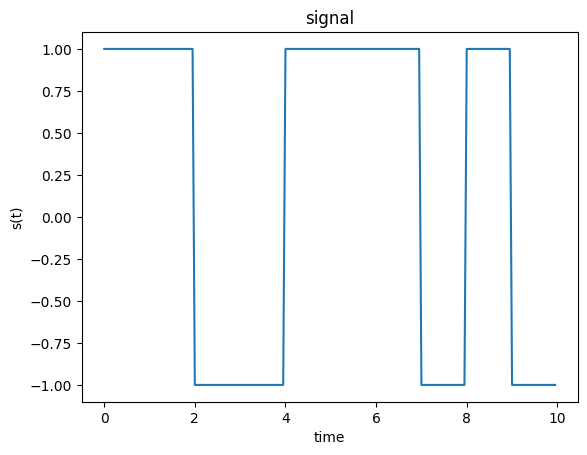

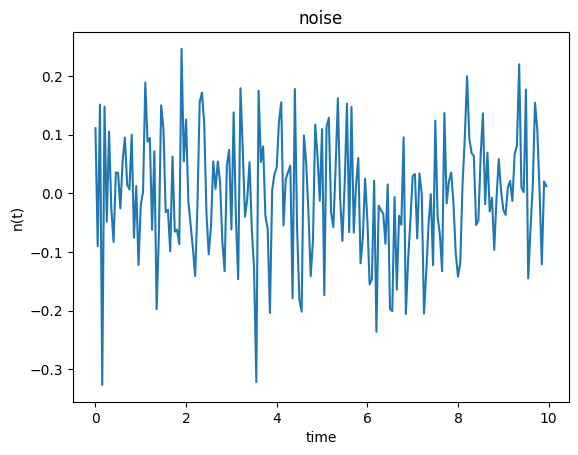

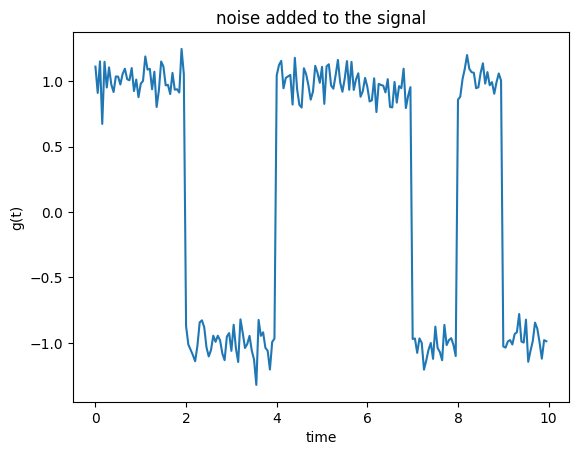

In [11]:
signal = binarycode_to_signal(bitstream, step)
plt.plot(t, signal)
plt.xlabel('time')
plt.ylabel('s(t)')
plt.title('signal')
plt.show()

# generate the noise
noise = AWGN(len(signal), sigma_noise)

plt.plot(t, noise)
plt.xlabel('time')
plt.ylabel('n(t)')
plt.title('noise')
plt.show()

# add the noise to the signal
signal_noise = signal+noise
plt.plot(t, signal_noise)
plt.xlabel('time')
plt.ylabel('g(t)')
plt.title('noise added to the signal')
plt.show()


Reconstructed Bitstram: [1 1 0 0 1 1 1 0 1 0]
Total number of bits: 10
Received Wrong: 0
BER: 0.0


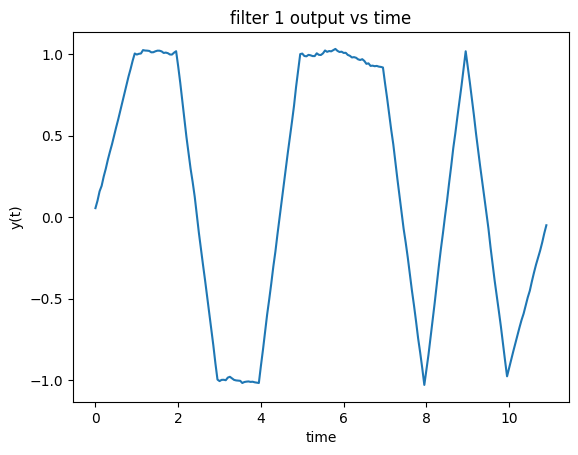

In [12]:

filter_num = 1
signal_noise_filter = receive_filter(signal_noise, filter_num, step)
plt.plot(np.arange(0, len(signal_noise_filter)*step, step), signal_noise_filter)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.title('filter ' + str(filter_num) + ' output vs time')
plt.savefig('filter_' + str(filter_num) + '_output.jpg')

# sample the filtered signal
sampling_period = int(1/step)
samples = sampler(sampling_period, signal_noise_filter)
# decode the samples
reconstructed_bitstram = decision_maker(samples, 0)
print('Reconstructed Bitstram:', reconstructed_bitstram)
print("Total number of bits:", len(bitstream))
print("Received Wrong:", np.sum(bitstream != reconstructed_bitstram))
print("BER:", np.sum(bitstream != reconstructed_bitstram)/len(bitstream))


Reconstructed Bitstram: [1 1 0 0 1 1 1 0 1 0]
Total number of bits: 10
Received Wrong: 0
BER: 0.0


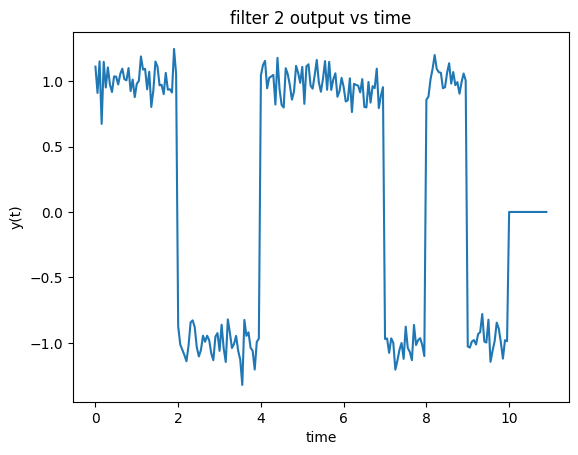

In [13]:

filter_num = 2
signal_noise_filter = receive_filter(signal_noise, filter_num, step)
plt.plot(np.arange(0, len(signal_noise_filter)*step, step), signal_noise_filter)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.title('filter ' + str(filter_num) + ' output vs time')
plt.savefig('filter_' + str(filter_num) + '_output.jpg')

# sample the filtered signal
sampling_period = int(1/step)
samples = sampler(sampling_period, signal_noise_filter)
# decode the samples
reconstructed_bitstram = decision_maker(samples, 0)
print('Reconstructed Bitstram:', reconstructed_bitstram)
print("Total number of bits:", len(bitstream))
print("Received Wrong:", np.sum(bitstream != reconstructed_bitstram))
print("BER:", np.sum(bitstream != reconstructed_bitstram)/len(bitstream))


Reconstructed Bitstram: [1 1 0 0 1 1 1 0 1 0]
Total number of bits: 10
Received Wrong: 0
BER: 0.0


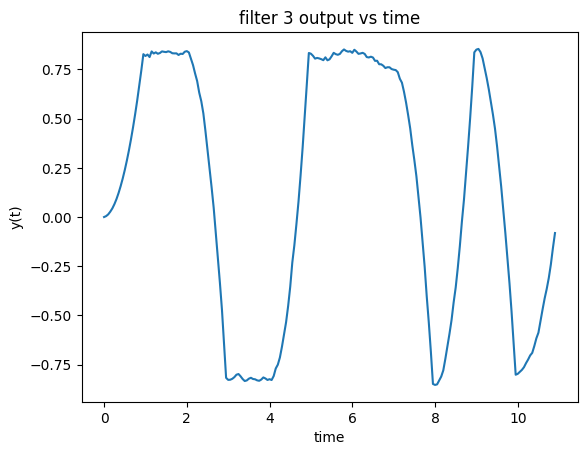

In [14]:

filter_num = 3
signal_noise_filter = receive_filter(signal_noise, filter_num, step)
plt.plot(np.arange(0, len(signal_noise_filter)*step, step), signal_noise_filter)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.title('filter ' + str(filter_num) + ' output vs time')
plt.savefig('filter_' + str(filter_num) + '_output.jpg')

# sample the filtered signal
sampling_period = int(1/step)
samples = sampler(sampling_period, signal_noise_filter)
# decode the samples
reconstructed_bitstram = decision_maker(samples, 0)
print('Reconstructed Bitstram:', reconstructed_bitstram)
print("Total number of bits:", len(bitstream))
print("Received Wrong:", np.sum(bitstream != reconstructed_bitstram))
print("BER:", np.sum(bitstream != reconstructed_bitstram)/len(bitstream))


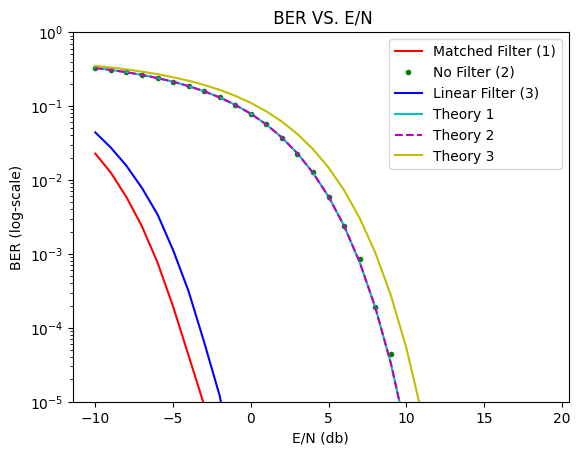

In [18]:

n = 1000000  # bitstream length

step = 0.05  # 20 Samples per pulse of duration 1
T = 1

# generate the binary symbols
input_bitstream = BinarySource(n)

# generate the binary signal
g_t = binarycode_to_signal(input_bitstream, step)

# plot BER VS. E/No for each filter
E_N = np.arange(-10, 20, 1)
N = 1/(10**(E_N/10))
# the corresponding range of sigma.
variance = np.sqrt(N/2)


# Filter 1:
filter1_BER, filter1_BER_th = np.zeros(len(variance)), np.zeros(len(variance))
for i in range(len(variance)):
    filter1_BER[i] = compute_BER(variance[i], 1)
    filter1_BER_th[i] = Q(1/variance[i])

# Filter 2:
filter2_BER, filter2_BER_th = np.zeros(len(variance)), np.zeros(len(variance))
for i in range(len(variance)):
    filter2_BER[i] = compute_BER(variance[i], 2)
    filter2_BER_th[i] = Q(1/variance[i])

# Filter 3:
filter3_BER, filter3_BER_th = np.zeros(len(variance)), np.zeros(len(variance))
for i in range(len(variance)):
    filter3_BER[i] = compute_BER(variance[i], 3)
    filter3_BER_th[i] = Q(np.sqrt(3)/2*1/variance[i])

plt.semilogy(E_N, filter1_BER, 'r')
plt.semilogy(E_N, filter2_BER, 'g.')
plt.semilogy(E_N, filter3_BER, 'b')
plt.semilogy(E_N, filter1_BER_th, 'c')
plt.semilogy(E_N, filter2_BER_th, 'm--')
plt.semilogy(E_N, filter3_BER_th, 'y')

plt.xlabel('E/N (db)')
plt.ylabel('BER (log-scale)')
plt.title(' BER VS. E/N')
plt.legend(['Matched Filter (1)', 'No Filter (2)',
           'Linear Filter (3)', 'Theory 1', 'Theory 2', 'Theory 3'])
plt.ylim([10/(n), 1])
plt.savefig('./BitErrorRate.png')


In [ ]:
""" 
The BER is decreasing as a function of E/No as in the plot. We can justify this in different ways:

As in the theoritical expression and knowing that Q is a decreasing function, its clear that Q(a * sqrt(E/No))
for all the cases above. Hence, BER is a decreasing function of E/No (noting that sqrt is an increasing function)

"""

""" 
The matched filter case is the one with lowest BER since it uses a filter matched to the pulse
to minimize the probability of error To accompolish this it equivalently maximizes the peak pulse SNR at the sampling instant.

Note that in the theoritical case using a filter or not yields the same expression due to our assumptions on variance and PSD.
"""